In [ ]:
# Creating embeddings for the _0 generated fastas in 4.3.tsne_script.py

In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold, datasets

import umap
from sklearn.datasets import load_digits
import pickle

import torch

/agh/projects/noelia/sebastian/miniconda3.7/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Load embedding pickles

In [2]:
# natural sequences
object_file = open('embeddings.pkl', 'rb')
embeddings = pickle.load(object_file)

In [3]:
# generated sequences
object_file = open('/agh/projects/noelia/NLP/zymCTRL/tsne/embeddings-generated.pkl', 'rb')
embeddings_generated = pickle.load(object_file)

In [4]:
# concat the dictionaries

In [5]:
embeddings.update(embeddings_generated)

In [6]:
del embeddings['out']

In [224]:
#import pickle

# Open a file and use dump()
#with open('embeddings.pkl', 'wb') as file:
#    pickle.dump(embeddings, file)


# New method: get embeddings from the model

#### 1. using the pipeline directly

In [3]:
from transformers import pipeline

In [4]:
pipe = pipeline('feature-extraction', model='nferruz/ZymCTRL')

Some weights of the model checkpoint at nferruz/ZymCTRL were not used when initializing GPT2Model: ['lm_head.weight']
- This IS expected if you are initializing GPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
fasta_file = open('/agh/projects/noelia/NLP/zymCTRL/sequences/natural_2/finalfile.fasta','r') 

In [6]:
sequences = {}
for line in fasta_file:
    if '>' in line:
        label = line[1:].split('.fasta')[0]
        sequences[label]=''
    else:
        sequences[label] = line.strip()

fasta_file.close()

In [7]:
del sequences['*']

In [8]:
del sequences['3.1.1.-_0']

In [9]:
del sequences['7.1.1.9_1']


In [14]:
del sequences['out1']

NameError: name 'sequences' is not defined

In [11]:
sequences

{'1.-.-.-_0': 'HASVIGFDIIVTSDHFHPWCDTGGQAGHPWIWLTAVAERIKKVEIGTAVTTPLFRYHPAIVAQAFATLDYLYPGRVFITVGTGHAMNEVPLGFQWPSFKEKVERLKEAIEIIQLLWKGDFVDYDGKYYKLIKAKLYTKPKEKIKLYVATSNSKVAEIAGEHGDGILTNPRGLQNYLEIAAAMEKAAERVGRDPNTLHRCMEFKVSYDVDYEKAFRAAMFWAPTAIPRQKREKISDPRELEAMVGPEEEKKIKETWLITSDSDDIYKSLGEFLKLGFDRVYIHSASPNEEKFLNLLGREILPWMREYYESLKVPIRASAE',
 '1.-.-.-_1': 'MALVPDHEDFFSRRCVWVNGPIIVGAGPSGLAVGACFKDHGVPFVILERSDCIASLWQKRTYDRLKLHLPKQFCELPKVPFPDDFPEYPTRKQFIDYLESYARRFDLQPRFNEAVQSAKYDETCGLWRVRTASASAAGVAPAEVEYICRWLVVATGENAETVVPDMEGIEEFGGQVIHACDYKSGEVYRGKRVLVVGCGNSGMEVCLDLTHHDAFPSMVVRDSVHVLPREVLGKSTFELAVLLLRWLPLWLVDKILLVLSWLVLGNLEKYGIKRPAVGPLELKNTEGKTPVLDIGALGKIRSGDIKVVPGIKQFTRGKVELVDGRAIDVDAVILATGYRSNVCSWLQDSDFFSKNGFPRQPFPHGWKGSSGLYAVGFTRRGLSGASLDATRIADDISRVWREETKQAKQFIAFHRRCISQI',
 '1.1.-.-_0': 'MIISSASDYRAAAKRKLPRFLFDYIDGGAYAEHTLRANGSDLADISLRQRVLKNVDNVSLETRLFGESLAMPIILSPVGLSGMYARRGEVQVARAAANKRIPFCLSTVSVCSIEEVASQSDQAIWFQLYVLKDRGFMKNALERAKAAGVTTLVFTVDMPTPGARYRDAHSGMSGPYAAPRRILQAMTKPDWALNVGLLGRPHDLGNISR

In [12]:
#embeddings={}
import random
labels =  list(sequences.keys())
random.shuffle(labels)
for label in labels:
#for label,fasta in sequences.items():
    #if '-' in label: continue
    if label in embeddings: continue
    print(label)
    sentence = f"{label.split('_')[0]}<sep><start>{sequences[label]}<end><|endoftext|>"
    embeddings[label]=pipe(sentence)[0][0]

1.8.1.12_0
2.1.1.164_0
2.4.1.216_0
4.2.3.31_0
1.2.1.60_0
7.3.2.1_0
4.1.1.113_0
3.4.11.-_0
3.1.1.25_1
1.2.1.91_0
1.1.3.40_0
2.4.1.65_0
1.1.1.326_0
1.14.13.163_1
4.2.3.188_0
3.1.1.35_0
2.4.-.-_0
2.4.2.3_0
1.3.99.5_1
1.17.1.8_1
1.2.3.4_1
1.14.14.176_0
1.1.1.409_1
3.5.5.-_0
3.4.24.30_0
4.99.1.2_0
2.7.1.92_0
1.6.2.6_1
1.13.11.84_0
1.2.1.1_0
2.1.1.156_0
2.7.8.45_1
2.7.6.5_0
2.4.1.272_0
2.7.4.7_1
2.1.1.239_0
1.3.99.39_1
6.3.5.13_0
4.4.1.34_0
4.3.1.-_1
4.1.99.5_0
2.3.1.93_1
3.5.1.24_1
1.3.1.n3_0
3.6.1.21_0
1.14.14.35_1
5.4.1.-_1
1.6.99.2_1
4.2.3.47_1
3.1.2.30_0
1.14.11.54_0
1.14.13.246_0
5.6.2.2_0
3.4.15.6_0
3.4.11.23_0
1.14.19.31_1
2.7.4.16_1
3.4.23.18_0
3.5.1.41_1
1.13.11.57_0
2.6.1.66_0
2.4.2.4_1
1.14.14.96_0
1.21.4.2_0
6.3.-.-_1
1.14.11.11_1
3.1.1.n2_1
3.1.3.73_1
1.2.7.11_1
2.8.3.12_1
2.1.1.55_1
2.7.8.36_0
3.4.11.23_1
3.5.1.6_0
1.3.1.87_1
3.2.2.9_1
1.4.1.11_1
2.5.1.107_0
2.4.1.56_1
1.6.99.3_0
3.6.3.21_1
1.1.1.90_1
1.1.1.394_1
1.14.15.29_1
2.7.14.1_1
3.2.1.39_0
2.1.2.5_0
3.6.3.42_1
6.1.1.20

4.4.1.24_0
3.5.1.128_1
2.8.1.-_1
2.8.2.1_1
1.1.4.1_0
5.3.1.n1_0
1.14.13.149_1
5.4.99.60_1
2.7.1.178_0
1.14.11.42_0
2.3.1.5_0
1.5.1.37_1
5.1.3.38_1
2.3.1.153_1
4.2.1.168_0
3.1.3.108_1
4.2.1.8_1
1.13.12.21_1
1.14.11.14_0
6.-.-.-_1
2.4.1.26_0
1.5.99.2_1
4.2.3.183_0
2.6.1.110_0
2.1.1.127_1
2.8.1.13_0
1.3.1.110_0
4.1.1.35_1
1.14.14.147_1
1.4.5.-_1
2.4.1.231_1
3.4.24.61_1
2.4.1.32_0
4.1.99.23_0
3.8.1.8_0
3.1.3.6_1
5.1.3.18_1
2.1.1.53_0
3.4.21.53_0
1.2.1.69_0
1.2.1.85_1
2.7.11.2_0
2.6.-.-_1
4.2.99.10_1
2.5.1.32_0
2.1.1.360_1
1.10.3.1_1
6.2.1.3_0
1.1.99.11_1
2.4.1.312_1
3.2.1.21_0
1.6.2.-_1
3.2.1.41_0
1.7.1.13_0
2.3.1.182_1
3.6.3.26_0
1.14.13.50_1
6.2.1.-_1
2.6.1.80_0
4.1.1.106_1
1.1.2.8_1
1.97.1.1_1
2.7.8.33_0
3.4.21.19_1
3.2.1.154_1
2.1.1.188_1
2.4.1.318_0
6.3.2.9_0
5.3.1.35_1
1.14.14.91_1
1.14.99.63_1
2.7.1.213_0
1.13.12.18_1
1.8.4.1_0
2.7.7.41_0
3.2.1.208_0
3.5.4.33_0
2.7.8.2_1
1.1.2.2_0
4.2.1.109_0
6.1.1.24_0
2.5.1.96_0
3.4.24.75_0
2.3.2.35_0
2.1.1.61_1
2.5.1.36_0
2.4.1.141_0
4.2.3.130_1


7.4.2.11_1
3.4.24.66_0
2.1.3.6_1
3.2.1.118_1
3.1.1.73_1
5.1.3.34_0
5.3.1.4_1
1.11.-.-_1
3.4.22.55_0
4.1.1.110_0
3.4.21.14_0
4.2.3.130_0
6.2.1.45_0
2.1.1.185_1
3.1.3.41_1
3.2.1.1_1
2.7.7.19_1
3.4.21.76_0
2.6.1.59_1
2.8.1.5_0
4.2.3.16_0
2.7.11.18_1
3.6.5.1_0
4.2.1.32_0
1.2.7.4_1
4.2.3.118_0
4.2.3.193_1
3.5.1.77_1
6.3.2.5_0
4.2.1.3_1
5.3.99.4_0
2.5.-.-_0
1.11.1.26_1
3.4.11.7_0
1.1.1.340_0
1.6.5.9_0
2.3.1.119_1
2.3.1.222_1
1.1.3.47_1
5.4.99.8_0
4.6.1.23_1
1.14.13.200_1
2.6.1.104_1
1.5.1.1_0
2.1.1.218_0
2.7.7.48_0
3.5.4.35_0
4.1.1.71_0
5.1.3.9_0
1.16.1.-_0
1.1.98.-_1
4.1.3.38_1
2.4.1.17_1
2.3.1.n3_1
2.6.1.101_1
1.11.1.8_0
1.7.1.4_1
2.7.1.33_0
1.1.1.72_1
1.15.1.2_1
3.2.1.130_0
2.6.1.86_1
1.5.-.-_0
2.7.8.31_1
5.4.1.4_1
2.4.1.14_0
2.7.1.154_1
6.3.2.31_0
4.2.2.23_0
2.3.1.274_1
1.14.11.64_0
3.1.26.3_1
3.5.1.108_1
3.6.3.27_0
1.13.11.41_0
3.1.1.72_1
1.1.1.60_1
1.7.2.7_0
3.4.19.16_1
2.1.1.282_1
5.3.1.33_1
3.6.1.47_0
2.4.1.142_0
2.5.1.136_0
3.8.1.6_0
3.2.1.170_1
1.5.99.8_1
2.1.1.310_0
1.5.1.33_1
2.1

In [ ]:
#del embeddings['1.1.1.101_0']

In [10]:
del embeddings['out']

In [11]:
len(embeddings)

15185

In [6]:
matrix = np.array([x for x in embeddings.values()])
categories = np.array([f"{x.split('.')[0]}_" if '\n' in x else x.split('.')[0] for x in embeddings.keys()])

In [13]:
t_sne = TSNE(n_components=2,
    learning_rate="auto",
    perplexity=15,
    n_iter=1000,
    init="random",
    random_state=42,
)
tsne_results = t_sne.fit_transform(matrix)



In [14]:
ec_classes = [x for x in embeddings.keys()]

In [15]:
t_plot = {"tsne-2d-one":tsne_results[:,0],"tsne-2d-two":tsne_results[:,1], 'y':categories}

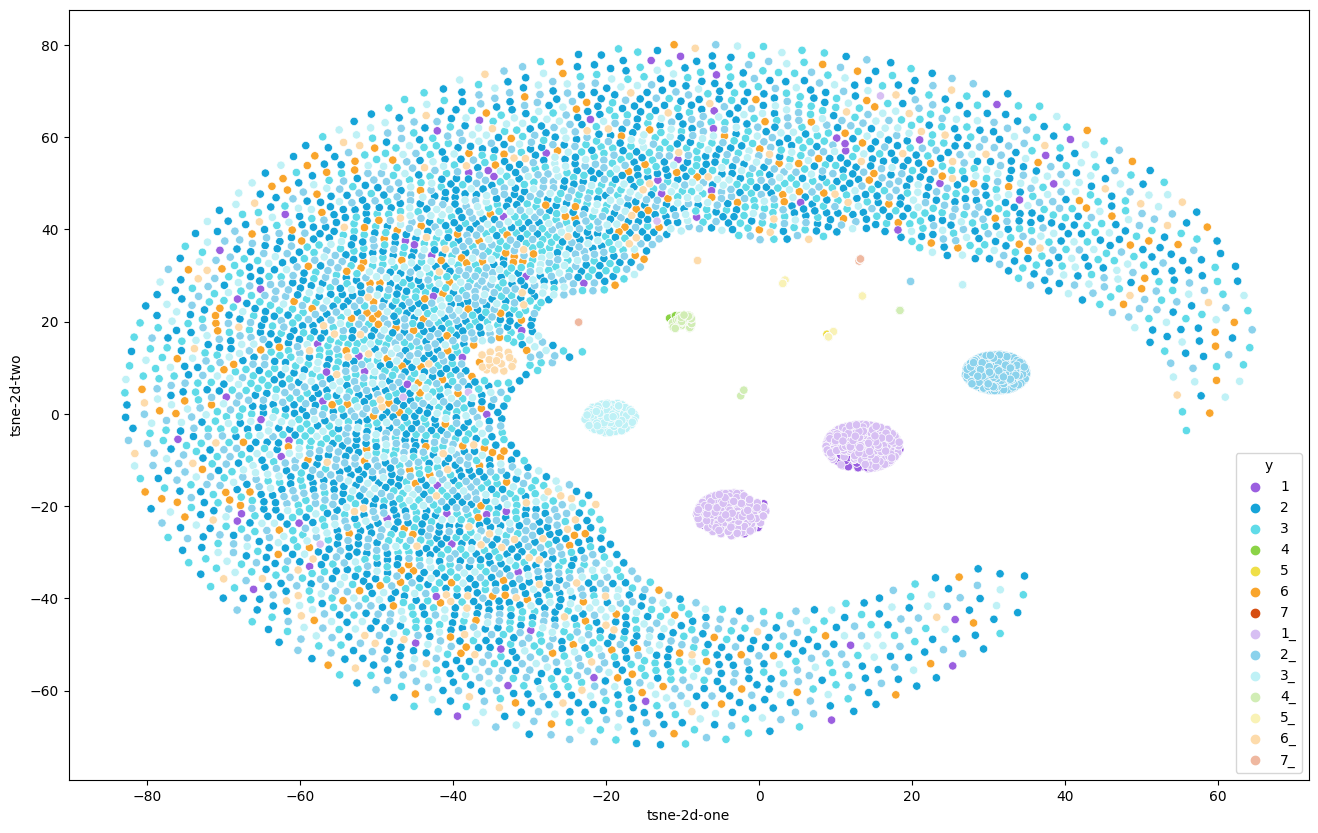

In [16]:
palette = ["#9b5fe0", "#16a4d8", "#60dbe8", "#8bd346", "#efdf48", 
           "#f9a52c", "#d64e12", "#d7bff3", "#8bd2ec", "#bff1f6", 
           "#d1edb5", "#f9f2b6", "#fddbab", "#efb8a0"]


plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette(palette, 14),
    data=t_plot,
    legend="full",
    alpha=1
)
#for index, value in enumerate(ec_classes):
#    plt.text(x=t_plot["tsne-2d-one"][index],y=t_plot["tsne-2d-two"][index],s=value,
#        fontdict=dict(color='black', size=16))

plt.show()


#### 2. Same as above but using UMAP

In [7]:
matrix = np.array([x for x in embeddings.values()])
categories = np.array([f"{x.split('.')[0]}_" if '\n' in x else x.split('.')[0] for x in embeddings.keys()])

In [39]:
umap_results = umap.UMAP(4, metric='cosine', min_dist=1).fit_transform(matrix)

In [40]:
u_plot = {"umap-2d-one":umap_results[:,0],"umap-2d-two":umap_results[:,1], 'y':categories}

In [41]:
palette = ["#8BB1B6", "#357780", "#29556C", "#BE653B", 
           "#BF653C", "#E0986D", "#EBBAA9",
           
           "#aac6ca", "#4ca9b5", "#3e81a3", 
           "#c7734b","#D8A28A", "#edc5ac", "#f9ece7"]

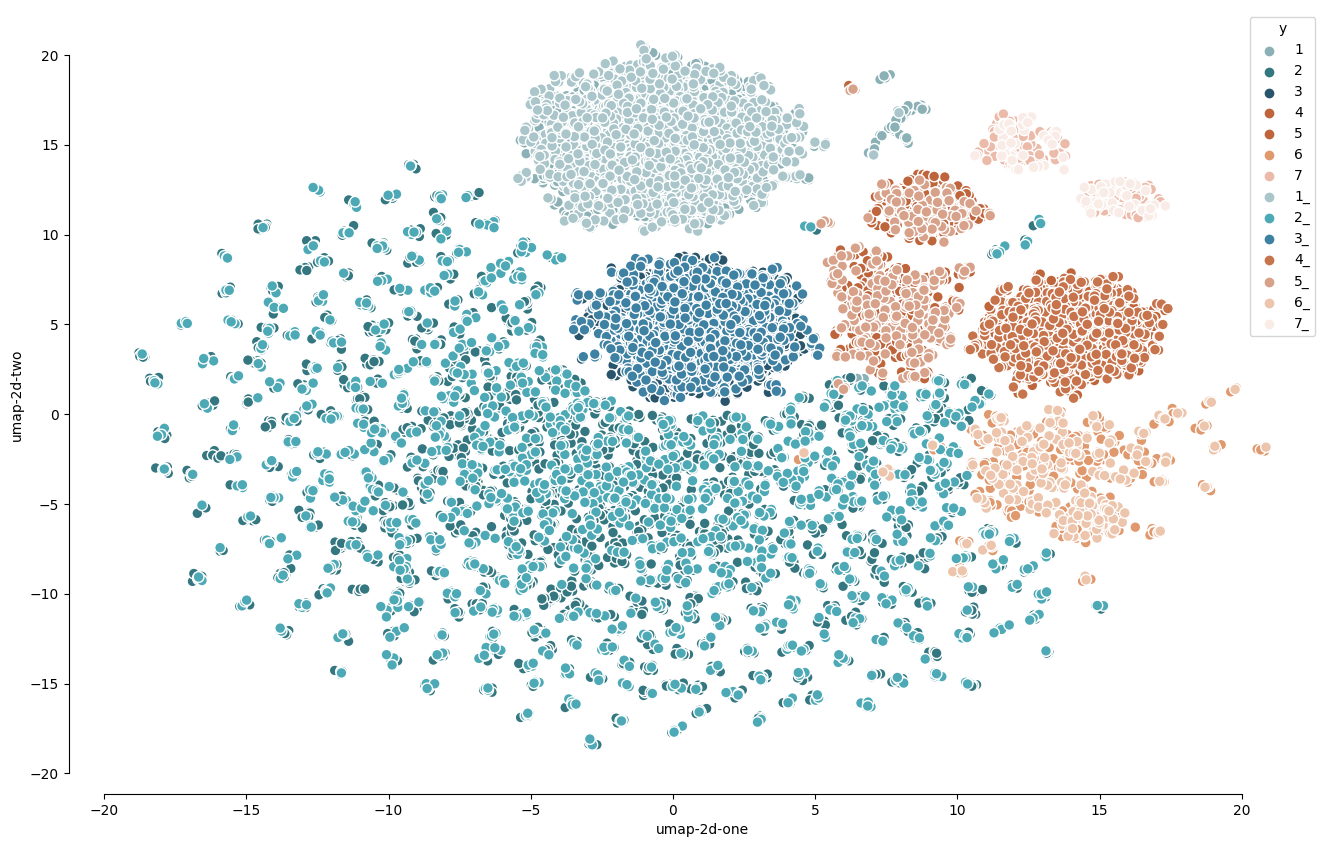

In [42]:
sns.set_style({'axes.facecolor':'white'})
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="umap-2d-one", 
    y="umap-2d-two",
    hue="y",
    palette=sns.color_palette(palette, 14),
    data=u_plot,
    legend=True,
    alpha=1,
    s=60,
    linewidth=1
)

sns.despine(offset=10, trim=True)

#for index, value in enumerate(ec_classes):
#    if '5.1.1.' in value:
#        plt.text(x=u_plot["umap-2d-one"][index],y=u_plot["umap-2d-two"][index],s=value,
#        fontdict=dict(color='black', size=16))

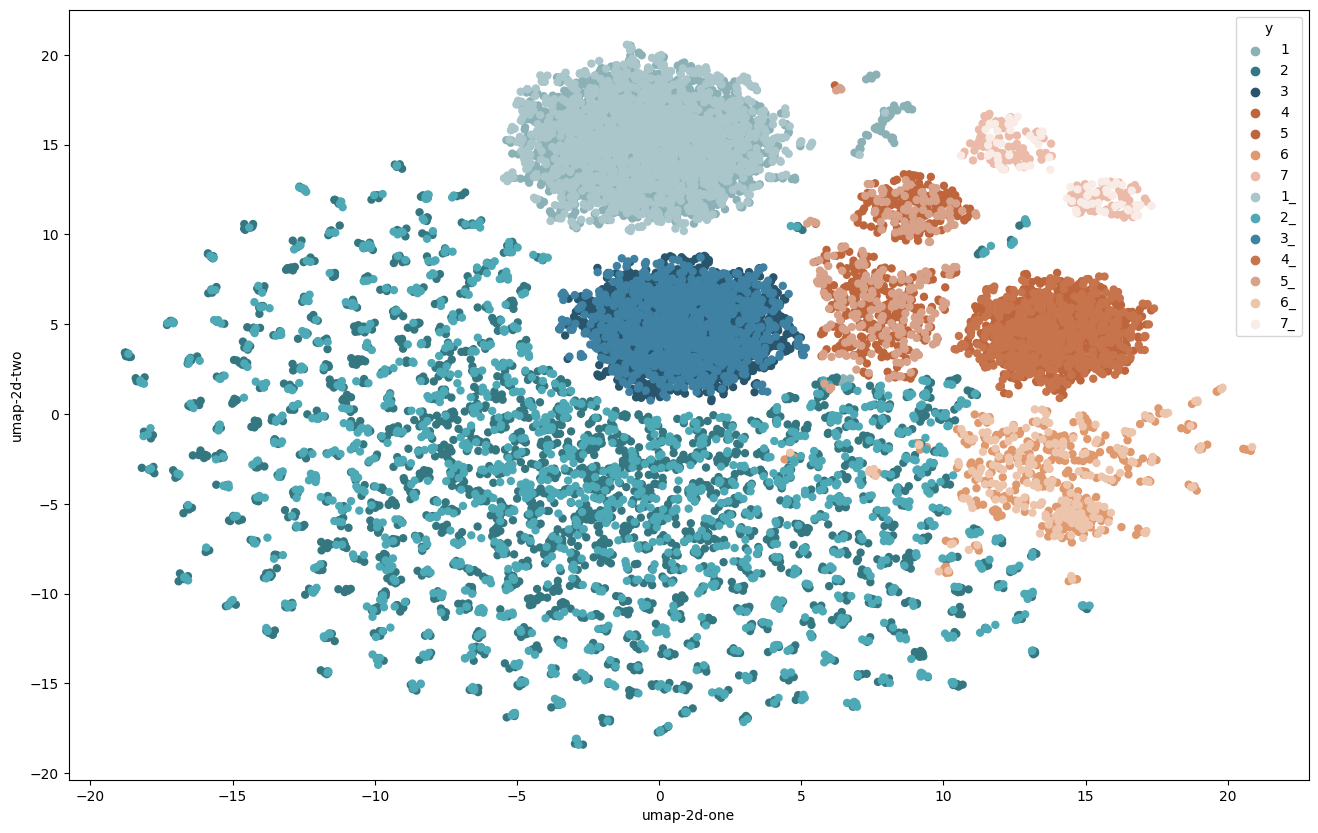

In [44]:
sns.set_style({'axes.facecolor':'white'})
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="umap-2d-one", 
    y="umap-2d-two",
    hue="y",
    palette=sns.color_palette(palette, 14),
    data=u_plot,
    legend=True,
    alpha=1,
    s=25,
    edgecolor=None,
    linewidth=1
)

#sns.despine(offset=10, trim=True)

#for index, value in enumerate(ec_classes):
#    if '5.1.1.' in value:
#        plt.text(x=u_plot["umap-2d-one"][index],y=u_plot["umap-2d-two"][index],s=value,
#        fontdict=dict(color='black', size=16))

In [13]:
palette = ["#9b5fe0", "#16a4d8", "#60dbe8", "#8bd346", "#efdf48", "#f9a52c", 
           "#d64e12", "#d7bff3", "#8bd2ec", "#bff1f6", 
           "#d1edb5", "#f9f2b6", "#fddbab", "#efb8a0"]

In [36]:
palette = ["#634687", "#8B6DA0", "#750545", "#B60A55", "#F17171", "#FFBF6B", "#FFE374",
           "#a891c6", "#baa8c7", "#ac698f", "#d36c99", "#f6a9a9", "#ffd8a6", "#ffeeab" ]



SyntaxError: invalid syntax (3727646844.py, line 1)

In [ ]:
# Get those that are in class 5, but with umap over 0

In [120]:
print("EC classes from the generated ones")
for index, value in enumerate(ec_classes):
    if value.startswith('5.1.1') and  '\n' in value:
        if u_plot["umap-2d-one"][index] > 0 :
            print(value.strip())       


EC classes from the generated ones
5.1.1.-
5.1.1.10
5.1.1.1
5.1.1.12
5.1.1.13
5.1.1.15
5.1.1.16
5.1.1.17
5.1.1.20
5.1.1.22
5.1.1.3
5.1.1.4
5.1.1.5
5.1.1.7
5.1.1.8
5.1.1.n1


In [121]:
print("EC classes from the natural ones")
for index, value in enumerate(ec_classes):
    if value.startswith('5.1.1') and  '\n' not in value:
        if u_plot["umap-2d-one"][index] > 0 :
            print(value.strip())       


EC classes from the natural ones
5.1.1.-_0
5.1.1.-_1
5.1.1.12_1
5.1.1.4_1
5.1.1.8_0
5.1.1.7_1
5.1.1.5_0
5.1.1.3_1
5.1.1.16_0
5.1.1.20_0
5.1.1.n1_1
5.1.1.22_1
5.1.1.20_1
5.1.1.24_1
5.1.1.24_0
5.1.1.13_1
5.1.1.3_0
5.1.1.12_0
5.1.1.18_1
5.1.1.8_1
5.1.1.19_0
5.1.1.13_0
5.1.1.22_0
5.1.1.5_1
5.1.1.18_0
5.1.1.n1_0
5.1.1.4_0
5.1.1.7_0


# Explore different types of embeddings (last layer?)

In [ ]:
device = torch.device("cuda")
tokenizer = AutoTokenizer.from_pretrained('/agh/projects/noelia/NLP/zymCTRL/dataset_preparation/tokenizer')
model = GPT2Model.from_pretrained('/agh/projects/noelia/NLP/zymCTRL/model').to(device)


In [5]:
sequence

'NYYKGADEVHGVGGEWRVERQRLRWDILDAFAQAAQQAGIPHTEDFNRGNNEGVGYFQVNQKNGWRWNTAKAFLRPICYRRPNFRMWIGAHVKQLNIEPGPDGALRCTGAEVWNGKELVHVHATAQVLLCAGSIGSPQLLQLSGVGPADLLQRHGVTVRRDLPGVGANLQDHLQIRAVFKVQGVETLNTLANSWHGKARIGLQYLFTRSGPMSMAPSQLGAFTRSTPDRPWPNVEYHVQPLSLDAFGEPLHPFNAFTASVCNLNPTSRGSVRIRSPRFEDSPAIAPLYLSTPEDRQVAADSLRLTRRIVAQPALAKYQPQEWRPGVQYQSDEELARLAGDIATTIFHPVGTTKMGRDDDPMAVLDSQLRVRGVAGLRVVDAGAMPTITSGNTNSPILMMAERAAEWVLRETARSGG'

In [6]:
sequence = sequences['1.1.1.59_0']
sentence = f'1.1.1.59<sep><start>{sequence}<end><|endoftext|>'
input_ids = torch.tensor(tokenizer.encode(sentence)).unsqueeze(0)

NameError: name 'torch' is not defined

In [ ]:
with torch.no_grad():
    outputs = model(sequence, labels=input_ids)
loss, logits = outputs[:2]